In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.style as style

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

# test cumulative revenue

In [3]:
pv = pd.read_csv("E:\\paper results\\solar\\dqn\\run1\\cum.csv")
wd = pd.read_csv("E:\\paper results\\wind\\run3\\cum.csv")
testdf = pd.DataFrame()
testdf["hour"] = pv["hour"]
testdf["pvbase"] = pv["cum_base"]
testdf["pvopt"] = pv["cum_opt"]
testdf["wdbase"] = wd["cum_base"]
testdf["wdopt"] = wd["cum_opt"]
testdf

,hour,pvbase,pvopt,wdbase,wdopt
0,0,0.0000,0.000000,6.5136,6.513600
1,1,0.0000,0.000000,8.8297,4.443600
2,2,0.0000,0.000000,7.8913,2.373600
3,3,0.0000,0.000000,5.7111,0.393600
4,4,0.0000,0.000000,4.0068,-1.676400
...,...,...,...,...,...
8731,8731,45465.9093,46237.580011,57160.8013,58141.939489
8732,8732,45465.9093,46237.580011,57164.4829,58145.621089
8733,8733,45465.9093,46237.580011,57167.1532,58148.291389
8734,8734,45465.9093,46237.580011,57168.9340,58150.072189


<ipython-input-4-3ac18706acf9>:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


(55000.0, 59000.0)

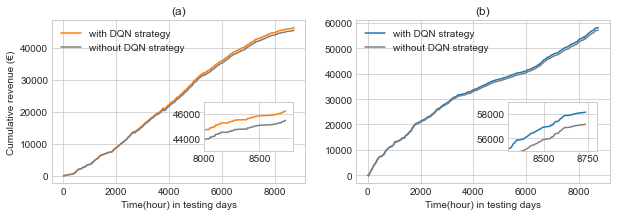

In [4]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_ylabel('Cumulative revenue (€)')
ax1.set_xlabel('Time(hour) in testing days')
ax1.set_title("(a)")
ax1.plot(testdf['pvopt'], label='with DQN strategy',color="#FF7F0E")
ax1.plot(testdf['pvbase'], label='without DQN strategy',color="#7F7F7F")
ax1.legend(loc=2)
inset_ax1 = ax1.inset_axes([0.6,0.2,0.35,0.3]) 
inset_ax1.plot(testdf['pvopt'], label='with DQN strategy',color="#FF7F0E")
inset_ax1.plot(testdf['pvbase'], label='without DQN strategy',color="#7F7F7F")
inset_ax1.set_xlim([8000,8800])
inset_ax1.set_ylim([43000,47000])

ax2.set_xlabel('Time(hour) in testing days')
ax2.set_title("(b)")
ax2.plot(testdf['wdopt'], label='with DQN strategy',color="#1F77B4")
ax2.plot(testdf['wdbase'], label='without DQN strategy',color="#7F7F7F")
ax2.legend(loc=2)
inset_ax2 = ax2.inset_axes([0.6,0.2,0.35,0.3]) 
inset_ax2.plot(testdf['wdopt'], label='with DQN strategy',color="#1F77B4")
inset_ax2.plot(testdf['wdbase'], label='without DQN strategy',color="#7F7F7F")
inset_ax2.set_xlim([8300,8800])
inset_ax2.set_ylim([55000,59000])

In [5]:
fig.savefig("C:\\Users\\yuche\\Desktop\\paper for wi\\figures\\cumrev.png",dpi=1200,bbox_inches='tight')

# agent behaviour

In [2]:
solar = pd.read_csv("E:\\paper results\\solar\\dqn\\run1\\TestActions\\test_action.csv")
ss = solar.loc[3528:3695]
sw = solar.loc[8232:8399]
wind = pd.read_csv("E:\\paper results\\wind\\run3\\TestActions\\test_action.csv")
ws = wind.loc[3528:3695]
ww = wind.loc[8232:8399]

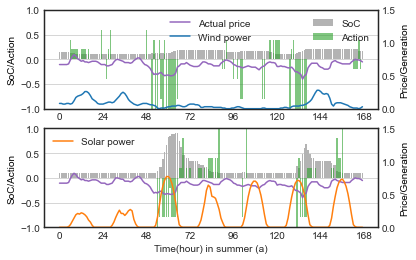

In [3]:
style.use('seaborn-white')
fig, (ax1,ax2) = plt.subplots(2)

soc = ws['soc'].to_numpy()
action = ws['control'].to_numpy()
price = ws['map_ap'].to_numpy()
fg = ws['fore_gen'].to_numpy()
x = np.arange(len(soc))
index_soc = np.arange(len(soc))
ax1.bar(index_soc, height=soc, color='#B3B3B3', label='SoC')
ax1.bar(index_soc, height=action, color='#2CA02C', label='Action', alpha=0.6)
ax1.set_ylabel('SoC/Action', color='black')
#ax1.set_xlabel('Time(hour) in summer')
ax1.set_xticks(np.arange(min(x), max(x) + 24, 24.0))
ax1.grid(axis="y")
ax1.legend(loc=1)
# price/fg
ax1a = ax1.twinx()
ax1a.plot(x, price, label='Actual price', color='#9467BD')
ax1a.plot(x, fg, label='Wind power', color='#1F77B4')
ax1a.set_ylabel('Price/Generation', color='black')
ax1.set_ylim(-1, 1)
ax1a.set_ylim(0, 1.5)
ax1a.legend(loc=9)

soc = ss['soc'].to_numpy()
action = ss['control'].to_numpy()
price = ss['map_ap'].to_numpy()
fg = ss['fore_gen'].to_numpy()
x = np.arange(len(soc))
index_soc = np.arange(len(soc))
ax2.bar(index_soc, height=soc, color='#B3B3B3', label='SoC')
ax2.bar(index_soc, height=action, color='#2CA02C', label='action', alpha=0.6)
ax2.set_ylabel('SoC/Action', color='black')
ax2.set_xlabel('Time(hour) in summer (a)')
ax2.set_xticks(np.arange(min(x), max(x) + 24, 24.0))
ax2.grid(axis="y")
# price/fg
ax2a = ax2.twinx()
ax2a.plot(x, price, color='#9467BD')
ax2a.plot(x, fg, label='Solar power', color='#FF7F0E')
ax2a.set_ylabel('Price/Generation', color='black')
ax2.set_ylim(-1, 1)
ax2a.set_ylim(0, 1.5)
ax2a.legend(loc=2)

In [4]:
fig.savefig('C:\\Users\\yuche\\Desktop\\paper for wi\\figures\\summer behaviour.png', dpi=1200, bbox_inches='tight')

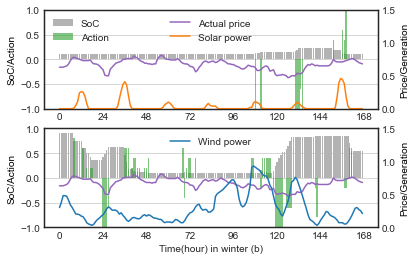

In [5]:
fig, (ax1,ax2) = plt.subplots(2)
soc = sw['soc'].to_numpy()
action = sw['control'].to_numpy()
price = sw['map_ap'].to_numpy()
fg = sw['fore_gen'].to_numpy()
x = np.arange(len(soc))
index_soc = np.arange(len(soc))
ax1.bar(index_soc, height=soc, color='#B3B3B3', label='SoC')
ax1.bar(index_soc, height=action, color='#2CA02C', label='Action', alpha=0.6)
ax1.set_ylabel('SoC/Action', color='black')
#ax1.set_xlabel('Time(hour) in winter')
ax1.set_xticks(np.arange(min(x), max(x) + 24, 24.0))
ax1.grid(axis="y")
ax1.legend(loc=2)
# price/fg
ax1a = ax1.twinx()
ax1a.plot(x, price, label='Actual price', color='#9467BD')
ax1a.plot(x, fg, label='Solar power', color='#FF7F0E')
ax1a.set_ylabel('Price/Generation', color='black')
ax1.set_ylim(-1, 1)
ax1a.set_ylim(0, 1.5)
plt.legend(loc=9)
soc = ww['soc'].to_numpy()
action = ww['control'].to_numpy()
price = ww['map_ap'].to_numpy()
fg = ww['fore_gen'].to_numpy()
x = np.arange(len(soc))
index_soc = np.arange(len(soc))
ax2.bar(index_soc, height=soc, color='#B3B3B3', label='SoC')
ax2.bar(index_soc, height=action, color='#2CA02C', label='action', alpha=0.6)
ax2.set_ylabel('SoC/Action', color='black')
ax2.set_xlabel('Time(hour) in winter (b)')
ax2.set_xticks(np.arange(min(x), max(x) + 24, 24.0))
ax2.grid(axis="y")
# price/fg
ax2a = ax2.twinx()
ax2a.plot(x, price, color='#9467BD')
ax2a.plot(x, fg, label='Wind power', color='#1F77B4')
ax2a.set_ylabel('Price/Generation', color='black')
ax2.set_ylim(-1, 1)
ax2a.set_ylim(0, 1.5)
plt.legend(loc=9)

In [6]:
fig.savefig('C:\\Users\\yuche\\Desktop\\paper for wi\\figures\\winter behaviour.png', dpi=1200, bbox_inches='tight')

# charging/discharging amount

In [75]:
wchdf = pd.read_csv("E:\\paper results\\wind\\run3\\Teststorage.csv")
wchdf

,Unnamed: 0,monthly charging power,monthly discharging power,month
0,0,8.093040,6.555362,1
1,1,2.611603,2.112296,2
2,2,6.600264,5.323785,3
3,3,3.459099,2.812440,4
4,4,2.972000,2.282830,5
5,5,6.585068,4.608967,6
6,6,1.056000,1.707098,7
7,7,4.062000,3.293341,8
8,8,4.648000,3.267346,9
9,9,5.732000,5.135740,10


In [76]:
schdf = pd.read_csv("E:\\paper results\\solar\\dqn\\run1\\Teststorage.csv")
schdf

,Unnamed: 0,monthly charging power,monthly discharging power,month
0,0,0.318000,0.243000,1
1,1,2.252000,1.838700,2
2,2,8.826117,6.592601,3
3,3,6.760981,6.032949,4
4,4,7.682343,6.222698,5
5,5,10.818580,8.118608,6
6,6,1.176000,1.597002,7
7,7,5.228667,4.235220,8
8,8,5.636000,4.565160,9
9,9,3.140000,2.543400,10


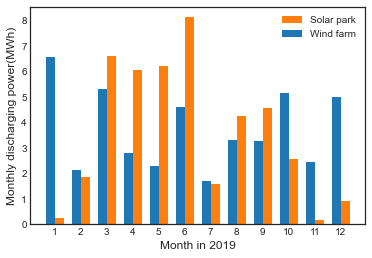

In [77]:
fig, ax1 = plt.subplots()
labels = schdf["month"].apply(lambda x: str(x)).tolist()
x = np.arange(len(labels))  # the label locations
sch = schdf["monthly discharging power"].tolist()
wch = wchdf["monthly discharging power"].tolist()

width = 0.35  # the width of the bars

ax1.bar(x + width / 2, sch, width, label='Solar park',color="#FF7F0E")
ax1.bar(x - width / 2, wch, width, label='Wind farm',color="#1F77B4")

ax1.set_ylabel('Monthly discharging power(MWh)',fontsize=12)
ax1.set_xlabel('Month in 2019')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

In [78]:
fig.savefig('C:\\Users\\yuche\\Desktop\\paper for wi\\figures\\discharging amount.png', dpi=1200, bbox_inches='tight')

# cvar

In [6]:
pvcvar = pd.read_csv("E:\\paper results\\solar\\dqn\\run1\\cvar.csv")
pvcvar

,Unnamed: 0,base,opt,month
0,0,80.15,81.19,1
1,1,114.01,120.52,2
2,2,109.45,109.60,3
3,3,203.25,172.88,4
4,4,112.74,110.05,5
5,5,288.50,229.18,6
6,6,110.71,113.20,7
7,7,120.58,104.36,8
8,8,82.11,83.06,9
9,9,69.40,74.17,10


In [7]:
wdcvar = pd.read_csv("E:\\paper results\\wind\\run3\\cvar.csv")
wdcvar

,Unnamed: 0,base,opt,month
0,0,293.76,300.30,1
1,1,144.15,146.39,2
2,2,182.90,187.14,3
3,3,211.20,211.23,4
4,4,116.59,121.07,5
5,5,170.15,151.59,6
6,6,52.93,54.26,7
7,7,48.84,51.20,8
8,8,83.56,84.79,9
9,9,94.48,104.83,10


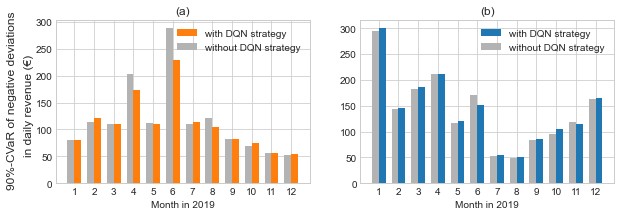

In [8]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

labels = pvcvar["month"].apply(lambda x: str(x)).tolist()
x = np.arange(len(labels))  # the label locations
solar_base = pvcvar["base"].tolist()
solar_opt = pvcvar["opt"].tolist()
wind_base = wdcvar["base"].tolist()
wind_opt = wdcvar["opt"].tolist()
width = 0.35  # the width of the bars

ax1.bar(x + width / 2, solar_opt, width, label='with DQN strategy',color="#FF7F0E")
ax1.bar(x - width / 2, solar_base, width, label='without DQN strategy',color="#B3B3B3")
#ax1.set_ylabel('90%CVaR of negative deviations ')
ax1.text(-3, -10, "90%-CVaR of negative deviations", rotation=90, wrap=True, fontsize=12)
ax1.text(-2.3, 50, "in daily revenue (€)",rotation=90, wrap=True, fontsize=12,verticalalignment='center',)
ax1.set_xlabel('Month in 2019')
ax1.set_title("(a)")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

ax2.bar(x + width / 2, wind_opt, width, label='with DQN strategy',color="#1F77B4")
ax2.bar(x - width / 2, wind_base, width, label='without DQN strategy',color="#B3B3B3")
#ax2.set_ylabel('90%CVaR of negative deviations in daily revenue(€)')
ax2.set_xlabel('Month in 2019')
ax2.set_title("(b)")
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

In [109]:
fig.savefig('C:\\Users\\yuche\\Desktop\\paper for wi\\figures\\cvar.png', dpi=1200, bbox_inches='tight')

# training process

In [110]:
pv1 = pd.read_csv("E:\\paper results\\solar\\dqn\\run1\\train_episode_R.txt")
pv2 = pd.read_csv("E:\\paper results\\solar\\dqn\\run2\\train_episode_R.txt")
pv3 = pd.read_csv("E:\\paper results\\solar\\dqn\\run3\\train_episode_R.txt")
pv4 = pd.read_csv("E:\\paper results\\solar\\dqn\\run4\\train_episode_R.txt")
pv5 = pd.read_csv("E:\\paper results\\solar\\dqn\\run5\\train_episode_R.txt")
wd1 = pd.read_csv("E:\\paper results\\wind\\run1\\train_episode_R.txt")
wd2 = pd.read_csv("E:\\paper results\\wind\\run2\\train_episode_R.txt")
wd3 = pd.read_csv("E:\\paper results\\wind\\run3\\train_episode_R.txt")
wd4 = pd.read_csv("E:\\paper results\\wind\\run4\\train_episode_R.txt")
wd5 = pd.read_csv("E:\\paper results\\wind\\run5\\train_episode_R.txt")

In [111]:
def calculate_sma(col):
    values = col.to_numpy()
    sma = []
    for i in range(0, values.size):
        array = values[:i + 1]
        mean_reward = np.mean(array[-100:])
        sma.append(mean_reward)
    return sma

In [112]:
pvsma1 = calculate_sma(pv1["return"])
pvsma2 = calculate_sma(pv2["return"])
pvsma3 = calculate_sma(pv3["return"])
pvsma4 = calculate_sma(pv4["return"])
pvsma5 = calculate_sma(pv5["return"])
wdsma1 = calculate_sma(wd1["return"])
wdsma2 = calculate_sma(wd2["return"])
wdsma3 = calculate_sma(wd3["return"])
wdsma4 = calculate_sma(wd4["return"])
wdsma5 = calculate_sma(wd5["return"])

In [113]:
df = pd.DataFrame()
df["ep"] = pv1["ep"]
df["pvsma1"] = pvsma1
df["pvsma2"] = pvsma2
df["pvsma3"] = pvsma3
df["pvsma4"] = pvsma4
df["pvsma5"] = pvsma5
df["wdsma1"] = wdsma1
df["wdsma2"] = wdsma2
df["wdsma3"] = wdsma3
df["wdsma4"] = wdsma4
df["wdsma5"] = wdsma5
df

,ep,pvsma1,pvsma2,pvsma3,pvsma4,pvsma5,wdsma1,wdsma2,wdsma3,wdsma4,wdsma5
0,1,-2665.706440,-2807.040252,-1738.188512,-1678.743852,-2217.948019,-420.172198,-788.951206,-620.773318,-473.639989,-362.839872
1,2,-2250.262490,-2288.679381,-2198.350762,-1812.834818,-2521.265004,-526.120362,-572.319409,-511.204462,-565.549761,-381.279594
2,3,-2403.929999,-2290.887054,-2046.930300,-2019.403513,-2274.946574,-636.303007,-585.575594,-542.974726,-619.876574,-508.923582
3,4,-2484.825433,-2159.779318,-2014.435715,-2083.117828,-2266.825936,-622.366821,-644.250543,-575.674208,-560.780857,-490.623932
4,5,-2515.509974,-2116.218458,-1935.701870,-2091.334284,-2508.371363,-631.411407,-616.889591,-553.767754,-489.398643,-514.672397
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-528.979097,-572.991505,-587.181747,-579.156205,-606.250782,-121.096773,-163.071811,-130.557316,-142.669111,-195.781910
4996,4997,-530.795662,-576.386949,-588.894493,-577.399073,-605.302821,-120.713490,-162.377973,-129.638361,-142.906816,-197.695907
4997,4998,-530.337067,-574.110410,-593.614103,-576.311319,-605.607273,-119.265185,-159.852214,-130.507435,-143.378606,-198.001108
4998,4999,-530.841439,-575.529882,-590.755166,-579.458269,-610.505645,-119.839047,-160.509902,-130.438845,-143.475665,-196.702430


In [114]:
pvcol = df.loc[:,"pvsma1":"pvsma5"]
pvmean = pvcol.mean(axis=1)
pvstd = pvcol.std(axis=1)
print(pvmean)
wdcol = df.loc[:,"wdsma1":"wdsma5"]
wdmean = wdcol.mean(axis=1)
wdstd = wdcol.std(axis=1)
print(wdmean)

0      -2221.525415
1      -2214.278491
2      -2207.219488
3      -2201.796846
4      -2233.427190
           ...     
4995    -574.911867
4996    -575.755799
4997    -575.996034
4998    -577.418080
4999    -577.070347
Length: 5000, dtype: float64
0      -533.275317
1      -511.294718
2      -578.730697
3      -578.739272
4      -561.227958
           ...    
4995   -150.635384
4996   -150.666509
4997   -150.200909
4998   -150.193178
4999   -150.155004
Length: 5000, dtype: float64


In [120]:
pvmean[3550:3600]

3550   -591.018102
3551   -591.330295
3552   -590.451514
3553   -589.823761
3554   -590.347463
3555   -588.780118
3556   -588.866791
3557   -589.662439
3558   -590.229274
3559   -589.557407
3560   -588.826877
3561   -588.774137
3562   -587.155005
3563   -588.046434
3564   -587.072375
3565   -587.116430
3566   -585.745122
3567   -584.736731
3568   -584.159718
3569   -582.170987
3570   -581.119525
3571   -581.698476
3572   -581.227650
3573   -580.008782
3574   -580.264501
3575   -578.324270
3576   -577.254845
3577   -577.834994
3578   -575.481709
3579   -577.617208
3580   -578.236382
3581   -578.248541
3582   -577.429044
3583   -577.534184
3584   -575.683266
3585   -572.756075
3586   -572.454156
3587   -571.471484
3588   -571.327050
3589   -571.796696
3590   -572.939981
3591   -571.433901
3592   -571.077776
3593   -571.188433
3594   -570.575449
3595   -570.029674
3596   -572.925607
3597   -572.529198
3598   -573.795580
3599   -573.142875
dtype: float64

In [129]:
wdmean[3450:3500]

3450   -134.976084
3451   -135.582026
3452   -136.430089
3453   -136.649229
3454   -136.668827
3455   -136.557253
3456   -136.692256
3457   -137.003407
3458   -136.851875
3459   -137.328669
3460   -137.703232
3461   -137.036103
3462   -136.214335
3463   -135.904850
3464   -135.602896
3465   -135.021400
3466   -135.227100
3467   -134.387225
3468   -134.235331
3469   -134.114477
3470   -134.117215
3471   -133.312692
3472   -133.440851
3473   -133.726367
3474   -134.253939
3475   -134.627714
3476   -134.026013
3477   -133.518948
3478   -133.410516
3479   -133.491181
3480   -133.271524
3481   -133.691634
3482   -132.906926
3483   -132.212172
3484   -131.268946
3485   -131.407039
3486   -131.530599
3487   -132.066227
3488   -132.352388
3489   -132.369689
3490   -132.672957
3491   -133.542282
3492   -133.165390
3493   -132.474835
3494   -131.390692
3495   -130.966970
3496   -131.247377
3497   -131.084661
3498   -131.833245
3499   -131.455814
dtype: float64

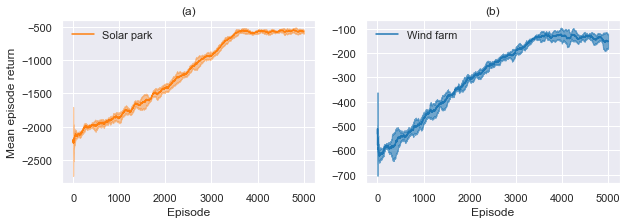

In [138]:
sns.set_theme()
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
x = df["ep"]

ax1.plot(x,pvmean,label="Solar park",color="#FF7F0E")
ax1.fill_between(x,pvmean-pvstd,pvmean+pvstd,alpha=0.4,color="#FF7F0E")
ax1.set_xlabel("Episode")
ax1.set_ylabel('Mean episode return')
ax1.set_title("(a)")
ax1.legend()

ax2.plot(x,wdmean,label="Wind farm",color="#1F77B4")
ax2.fill_between(x,wdmean-wdstd,wdmean+wdstd,alpha=0.6,color="#1F77B4")
ax2.set_xlabel('Episode')
ax2.set_title("(b)")
ax2.legend()

In [139]:
fig.savefig('C:\\Users\\yuche\\Desktop\\paper for wi\\figures\\training.png', dpi=1200, bbox_inches='tight')